In [1]:
!pip install numpy
!pip install pandas

import numpy as np
import pandas as pd


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


<h3>Converting Database into DataFrame</h3>
<hr>

In [2]:
drive = pd.read_csv('accident_data.csv')

In [3]:
drive

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
drive['Latitude'] = drive['Latitude'].fillna(drive['Latitude'].mode()[0])
drive['Longitude'] = drive['Longitude'].fillna(drive['Longitude'].mode()[0])
drive['Road_Surface_Conditions'] = drive['Road_Surface_Conditions'].fillna(drive['Road_Surface_Conditions'].mode()[0])
drive['Road_Type'] = drive['Road_Type'].fillna(drive['Road_Type'].mode()[0])
drive['Urban_or_Rural_Area'] = drive['Urban_or_Rural_Area'].fillna(drive['Urban_or_Rural_Area'].mode()[0])
drive['Weather_Conditions'] = drive['Weather_Conditions'].fillna(drive['Weather_Conditions'].mode()[0])

In [5]:
drive.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [6]:
drive['Accident_Severity'] = drive['Accident_Severity'].astype('category')
drive['Light_Conditions'] = drive['Light_Conditions'].astype('category')
drive['District Area'] = drive['District Area'].astype('category')
drive['Road_Surface_Conditions'] = drive['Road_Surface_Conditions'].astype('category')
drive['Road_Type'] = drive['Road_Type'].astype('category')
drive['Urban_or_Rural_Area'] = drive['Urban_or_Rural_Area'].astype('category')
drive['Weather_Conditions'] = drive['Weather_Conditions'].astype('category')
drive['Vehicle_Type'] = drive['Vehicle_Type'].astype('category')

In [7]:
drive.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

In [8]:
drive['Accident Date'] = drive['Accident Date'].str.strip()

In [9]:
drive['Accident Date'] = drive['Accident Date'].astype('str')

In [10]:
drive['Accident Date'] = drive['Accident Date'].str.replace('/','-')

In [11]:
drive['Accident Date'] = pd.to_datetime(drive['Accident Date'], dayfirst = True, errors ='coerce')

In [12]:
drive.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [13]:
drive['Year'] = drive['Accident Date'].dt.year
drive['Month'] = drive['Accident Date'].dt.month
drive['Day'] = drive['Accident Date'].dt.day
drive['DayOfWeek'] = drive['Accident Date'].dt.dayofweek

In [14]:
drive.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h3>Questions & Insights</h3>
<hr>

In [15]:
import matplotlib.pyplot as plt
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<h3>Question NO.1</h3>
<h4> In the accidents that happend which of the Accident_Severity has the most counts?</h4>

In [16]:
drive['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h3>Insights NO.1</h3>
<h4>Accorging to the data Slight damage has the most number</h4>

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\333496358.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  drive.groupby('Accident_Severity')['Index'].count().plot(kind='bar')


<Axes: xlabel='Accident_Severity'>

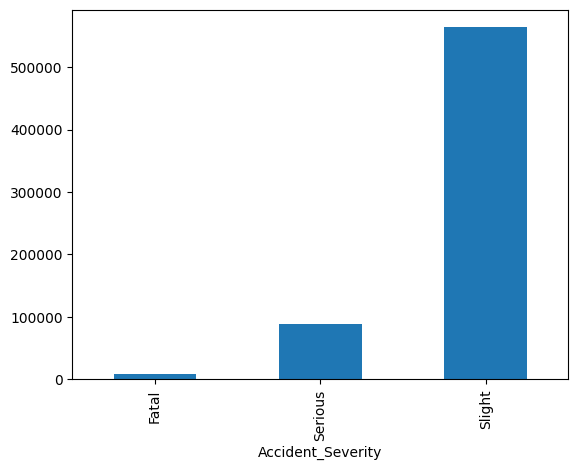

In [17]:
drive.groupby('Accident_Severity')['Index'].count().plot(kind='bar')

<h3>Question NO.2</h3>
<h4>What weather had the most serious vihicle accident that happend?</h4>

In [18]:
weather = drive.groupby(['Weather_Conditions', 'Accident_Severity']).size()
weather.unstack()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\2155991104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather = drive.groupby(['Weather_Conditions', 'Accident_Severity']).size()


Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7207,73285,454521
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637


<h3>Insights NO.2</h3>
<h4>The Fine no high winds weather has the most seriouse accident with 72046 total incident</h4>

<h3>Question NO.3</h3>
<h4>In the Road Surface Conditions what is prone to accident?</h4>

In [19]:
drive['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

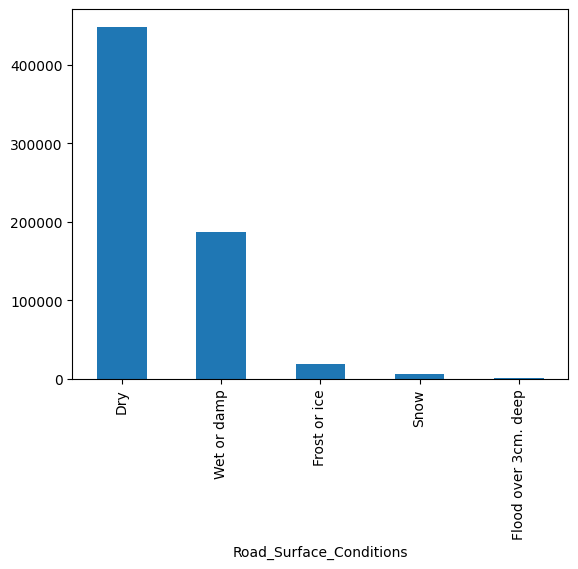

In [20]:
drive['Road_Surface_Conditions'].value_counts().plot(kind = 'bar')
plt.show()

<h3>Insights NO.3</h3>
<h4>The Dry surface has the highest incident</h4>

<h3>Question NO.4</h3>
<h4>What kind of vehicle has the highest accident record</h4>

In [21]:
drive['Vehicle_Type'].value_counts()


Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

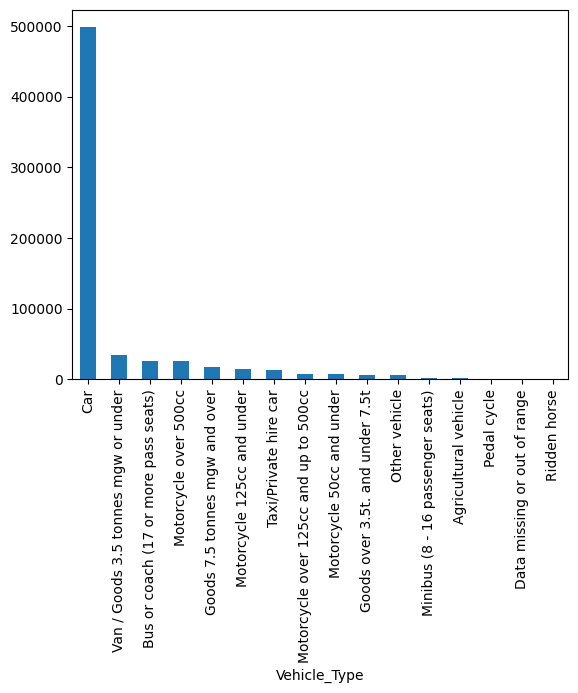

In [22]:
drive['Vehicle_Type'].value_counts().plot(kind = "bar")
plt.show()

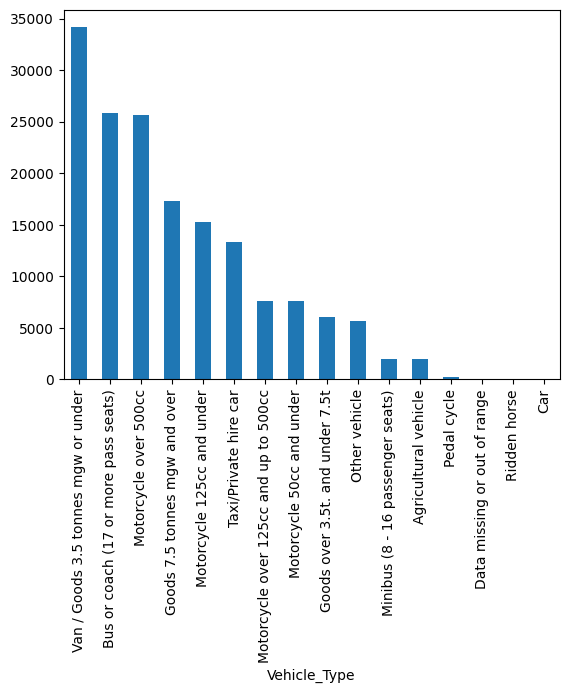

In [23]:
wacar = drive[drive['Vehicle_Type'] !='Car']
wacar['Vehicle_Type'].value_counts().plot(kind = "bar")
plt.show()

<h3>Insights NO.4</h3>
<h4>The Car has the most accident record</h4>

<h3>Question NO.5</h3>
<h3>Which of the two Urban and Rural have more accident records?</h3>

In [24]:
UR = drive['Urban_or_Rural_Area'].value_counts()

In [25]:
UR.index

CategoricalIndex(['Urban', 'Rural', 'Unallocated'], categories=['Rural', 'Unallocated', 'Urban'], ordered=False, dtype='category', name='Urban_or_Rural_Area')

In [26]:
UR.values

array([421678, 238990,     11])

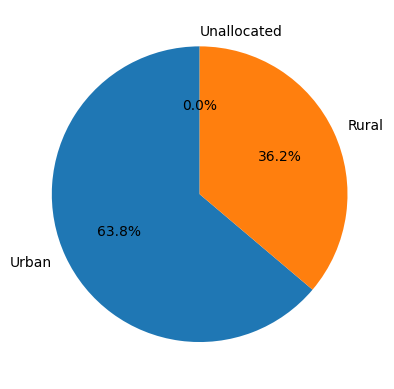

In [27]:
plt.pie(UR, 
        labels = UR.index,
        startangle = 90,
        autopct = '%1.1f%%'
       )
plt.show()

<h3>Insights NO.5</h3>
<h4>The Urban has more accidents with 63.8% records than Rural with 36.2% records</h4>

<h3>Question NO.6</h3>
<h4>Which part in the UK have the highest number of recorded road accidents?</h4>

In [28]:
drive['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h3>Insight no.6</h3>
<h4>According to the computation Birmingham has the most accidents that happend </h4>

<h3>Question NO.7</h3>
<h4>How many person is usually involve in a road accident?</h4>

In [29]:
drive['Number_of_Casualties'].mode()

0    1
Name: Number_of_Casualties, dtype: int64

<h3>Insights.No.7</h3>
<h4>Mostly only one person is involved on a road accident</h4>

<h3>Question NO.8</h3>
<h4>What weather has the least accident record?</h4>

In [30]:
drive['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

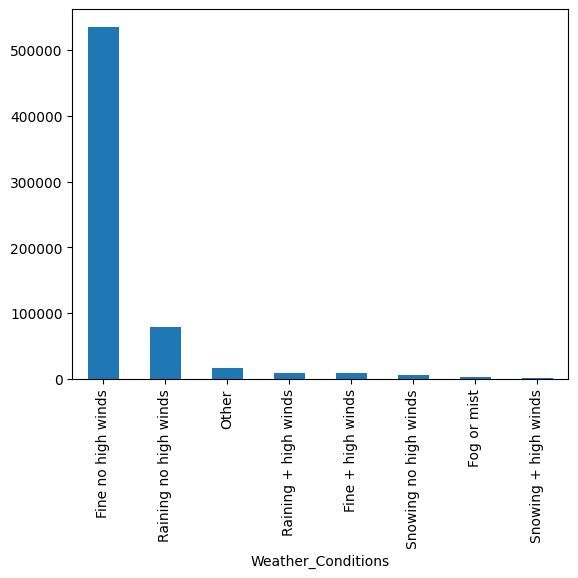

In [31]:
drive['Weather_Conditions'].value_counts().plot(kind = 'bar')
plt.show()

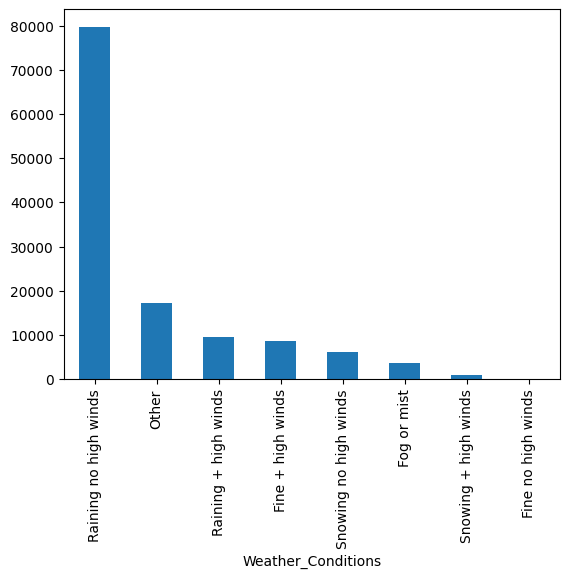

In [32]:
WE=drive [drive['Weather_Conditions'] !='Fine no high winds']
WE['Weather_Conditions'].value_counts().plot(kind = 'bar')
plt.show()

<h3>Insights NO.8</h3>
<h4>The Snowing + high winds has the least accident record</h4>

<h3>Question NO.9</h3>
<h4>How many vehicle mostly have an accident in one scene?</h4>

In [33]:
drive['Number_of_Vehicles'].value_counts()

Number_of_Vehicles
2     391995
1     200787
3      52806
4      11300
5       2464
6        758
7        296
8        147
9         57
10        27
11        12
14         9
12         7
13         6
16         4
28         1
15         1
32         1
19         1
Name: count, dtype: int64

<h3>Insights NO.9</h3>
<h4>2 Vehicles has the most record of an accident in one scene</h4>

<h3>Question NO.10</h3>
<h4>In this two different kind of vehicle <b>(Agricultural vehicle)</b>, <b>(Van)</b> which of the two has more accident in a single carriageway?</h4>

In [34]:
rr= drive.groupby(['Vehicle_Type','Road_Type']).size()
rr

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\2368358230.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rr= drive.groupby(['Vehicle_Type','Road_Type']).size()


Vehicle_Type                         Road_Type         
Agricultural vehicle                 Dual carriageway        293
                                     One way street           49
                                     Roundabout              129
                                     Single carriageway     1449
                                     Slip road                27
                                                           ...  
Van / Goods 3.5 tonnes mgw or under  Dual carriageway       5107
                                     One way street          723
                                     Roundabout             2294
                                     Single carriageway    25675
                                     Slip road               361
Length: 80, dtype: int64

In [35]:
rr.unstack()

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road
Vehicle_Type,,,,,
Agricultural vehicle,293,49,129,1449,27
Bus or coach (17 or more pass seats),4043,546,1704,19300,285
Car,74820,10223,33187,374464,5298
Data missing or out of range,1,0,0,5,0
Goods 7.5 tonnes mgw and over,2631,341,1110,13037,188
Goods over 3.5t. and under 7.5t,959,116,422,4541,58
Minibus (8 - 16 passenger seats),275,40,138,1507,16
Motorcycle 125cc and under,2228,307,991,11596,147
Motorcycle 50cc and under,1085,133,512,5784,89


<h3>Insights NO.10</h3>
<h4>The Van has more accident in a single carriageway than the Agriculture vehicle</h4>

<h3>Question NO.11</h3>
<h4>Which of the district areas has the least Road Surface Condition accidents?</h4>

In [36]:
DR= drive.groupby(['District Area', 'Road_Surface_Conditions']).size()
DR

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\2536427359.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  DR= drive.groupby(['District Area', 'Road_Surface_Conditions']).size()


District Area  Road_Surface_Conditions
Aberdeen City  Dry                         815
               Flood over 3cm. deep          0
               Frost or ice                 25
               Snow                         15
               Wet or damp                 468
                                          ... 
York           Dry                        1325
               Flood over 3cm. deep          0
               Frost or ice                 42
               Snow                         22
               Wet or damp                 508
Length: 2110, dtype: int64

In [37]:
DR.unstack()

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp
District Area,,,,,
Aberdeen City,815,0,25,15,468
Aberdeenshire,942,8,112,57,811
Adur,445,0,5,1,168
Allerdale,640,4,67,19,398
Alnwick,121,2,20,5,84
...,...,...,...,...,...
Wychavon,886,2,62,12,399
Wycombe,1179,6,54,18,472
Wyre,862,2,45,5,324


<h3>Insights NO.11</h3>
<h4>The Aberdeen City has the least and it's a snow condition with 15 incident</h4>

<h3>Question NO.12</h3>
<h4>Which Area has the least accident?</h4>

In [38]:
drive['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [39]:
DA = drive['District Area'].value_counts()

In [40]:
DA.index

CategoricalIndex(['Birmingham', 'Leeds', 'Manchester', 'Bradford', 'Sheffield',
                  'Westminster', 'Liverpool', 'Glasgow City',
                  'Bristol, City of', 'Kirklees',
                  ...
                  'Blaeu Gwent', 'South Shropshire',
                  'London Airport (Heathrow)', 'Western Isles',
                  'Clackmannshire', 'Berwick-upon-Tweed', 'Teesdale',
                  'Shetland Islands', 'Orkney Islands', 'Clackmannanshire'],
                 categories=['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York'], ordered=False, dtype='category', name='District Area', length=422)

<h3>Insights NO.12</h3>
<h4>The Clackmannanshire has the least accident</h4>

<h3>Question NO.13</h3>
<h4>How many accidents does the Pedal cycle have been involved during the daylight? </h4>

In [41]:
car = drive.groupby(['Light_Conditions', 'Vehicle_Type']).size()
car

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\2938520974.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  car = drive.groupby(['Light_Conditions', 'Vehicle_Type']).size()


Light_Conditions             Vehicle_Type                        
Darkness - lighting unknown  Agricultural vehicle                       19
                             Bus or coach (17 or more pass seats)      267
                             Car                                      4914
                             Data missing or out of range                0
                             Goods 7.5 tonnes mgw and over             185
                                                                     ...  
Daylight                     Other vehicle                            4132
                             Pedal cycle                               146
                             Ridden horse                                3
                             Taxi/Private hire car                    9752
                             Van / Goods 3.5 tonnes mgw or under     24944
Length: 80, dtype: int64

In [42]:
car.unstack()

Vehicle_Type,Agricultural vehicle,Bus or coach (17 or more pass seats),Car,Data missing or out of range,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Minibus (8 - 16 passenger seats),Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Van / Goods 3.5 tonnes mgw or under
Light_Conditions,,,,,,,,,,,,,,,,
Darkness - lighting unknown,19,267,4914,0,185,59,20,136,68,86,228,57,2,0,131,312
Darkness - lights lit,365,5142,96994,1,3440,1192,347,3074,1494,1480,5176,1126,39,1,2658,6806
Darkness - lights unlit,7,112,1933,0,67,16,4,50,26,25,88,23,2,0,49,141
Darkness - no lighting,113,1427,28385,0,963,367,121,794,424,447,1428,299,8,0,704,1957
Daylight,1443,18930,365766,5,12652,4462,1484,11215,5591,5618,18737,4132,146,3,9752,24944


<h3>Insights NO.13</h3>
<h4>There are 146 records that the Pedal cycle have been involved to a accident during the daylight</h4>

<h3>Question NO.14</h3>
<h4>What kind of road type has the least accident?</h4>

In [43]:
drive['Road_Type'].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h3>Insights NO.14</h3>
<h4>The slip road has the least accident</h4>

<h3>Question NO.15</h3>
<h4>How many car have an accident during the darkness and lighting unknown?</h4>

In [44]:
car =drive.groupby(['Light_Conditions', 'Vehicle_Type']).size()
car.unstack()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\849341115.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  car =drive.groupby(['Light_Conditions', 'Vehicle_Type']).size()


Vehicle_Type,Agricultural vehicle,Bus or coach (17 or more pass seats),Car,Data missing or out of range,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Minibus (8 - 16 passenger seats),Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Van / Goods 3.5 tonnes mgw or under
Light_Conditions,,,,,,,,,,,,,,,,
Darkness - lighting unknown,19,267,4914,0,185,59,20,136,68,86,228,57,2,0,131,312
Darkness - lights lit,365,5142,96994,1,3440,1192,347,3074,1494,1480,5176,1126,39,1,2658,6806
Darkness - lights unlit,7,112,1933,0,67,16,4,50,26,25,88,23,2,0,49,141
Darkness - no lighting,113,1427,28385,0,963,367,121,794,424,447,1428,299,8,0,704,1957
Daylight,1443,18930,365766,5,12652,4462,1484,11215,5591,5618,18737,4132,146,3,9752,24944


<h3>Insights NO.15</h3>
<h4>There are 4914 cars that have been into accident during the darkness and lighting unknown</h4>

<h3>Question NO.16</h3>
<h4>What kind of light condition has the least accident record?</h4>

In [45]:
drive['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h3>Insights NO.16</h3>
<h4>Darkness - lights unlit has the least Light condition record of accidents</h4>

<h3>Question NO.17</h3>
<h4>What kind of road type has the least most record during darkness lights unlit?</h4>

In [46]:
light = drive.groupby(['Light_Conditions', 'Road_Type']).size()
light

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\1997914620.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  light = drive.groupby(['Light_Conditions', 'Road_Type']).size()


Light_Conditions             Road_Type         
Darkness - lighting unknown  Dual carriageway         905
                             One way street           124
                             Roundabout               470
                             Single carriageway      4899
                             Slip road                 86
Darkness - lights lit        Dual carriageway       20242
                             One way street          3310
                             Roundabout             10528
                             Single carriageway     93940
                             Slip road               1315
Darkness - lights unlit      Dual carriageway         465
                             One way street            58
                             Roundabout               189
                             Single carriageway      1797
                             Slip road                 34
Darkness - no lighting       Dual carriageway        7460
                        

In [47]:
light.unstack()

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road
Light_Conditions,,,,,
Darkness - lighting unknown,905,124,470,4899,86
Darkness - lights lit,20242,3310,10528,93940,1315
Darkness - lights unlit,465,58,189,1797,34
Darkness - no lighting,7460,103,224,29293,357
Daylight,70352,9964,32581,366734,5249


<h3>Insights NO.17</h3>
<h4>The Single carriageway has the most record of accident during the Darkness lights unlit </h4>

<h3>Question NO.18</h3>
<h3>What latitude has the most record?</h3>

In [48]:
drive['Latitude'].mode()

0    52.458798
Name: Latitude, dtype: float64

<h3>Insights NO.18</h3>
<h4>Latitude 52.458798 has the most record</h4>

<h3>Question NO.19</h3>
<h4>In a serious road accident what light condition has the most accident?</h4>

In [49]:
acl = drive.groupby(['Accident_Severity', 'Light_Conditions']).size()
acl

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\197871541.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acl = drive.groupby(['Accident_Severity', 'Light_Conditions']).size()


Accident_Severity  Light_Conditions           
Fatal              Darkness - lighting unknown        68
                   Darkness - lights lit            1860
                   Darkness - lights unlit            45
                   Darkness - no lighting           1612
                   Daylight                         5076
Serious            Darkness - lighting unknown       794
                   Darkness - lights lit           19130
                   Darkness - lights unlit           360
                   Darkness - no lighting           7174
                   Daylight                        60759
Slight             Darkness - lighting unknown      5622
                   Darkness - lights lit          108345
                   Darkness - lights unlit          2138
                   Darkness - no lighting          28651
                   Daylight                       419045
dtype: int64

In [50]:
acl.unstack()

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Accident_Severity,,,,,
Fatal,68,1860,45,1612,5076
Serious,794,19130,360,7174,60759
Slight,5622,108345,2138,28651,419045


<h3>Insights NO.19</h3>
<h4>According to the data Daylight  has the most record with 60759 of having a serious accident</h4>

<h3>Question NO.20</h3>
<h4>What date has the most accident that happend?</h4>

In [51]:
drive['Accident Date'].mode()

0   2019-11-30
Name: Accident Date, dtype: datetime64[ns]

<h3>Insights NO.20</h3>
<h4>According to data records 30-11-2019 has the most accident that happend</h4>

<h3>Question NO.21</h3>
<H4>How many road accidents happend on the year 2020?</H4>

In [52]:
drive [drive['Year'] == 2020].value_counts().sum()

np.int64(170591)

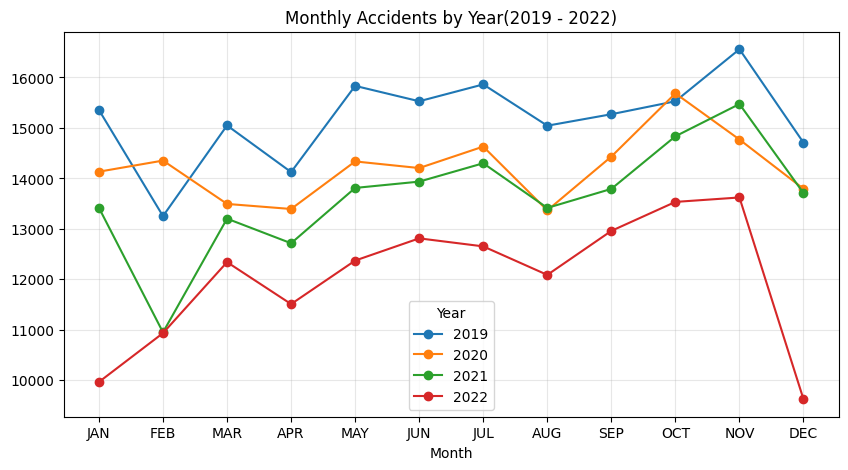

In [53]:
yearly_data = drive.groupby(['Year','Month']).size()
yearly_data = yearly_data.unstack(level=0)

yearly_data.plot(
    marker= 'o',
    figsize= (10,5),
    title = 'Monthly Accidents by Year(2019 - 2022)'
)

plt.xticks(range(1,13), ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
# plt.bbox_to_achor
plt.grid(alpha=0.3)
plt.show()

<h3>Insights NO.21</h3>
<h4>In the record of the accidents at year 2020 there are 170591 records of road accidents that happend.</h4>

<h3>Question NO.22</h3>
<h3>At the year 2020 what kind of weather is prone to road accidents?</h3>

In [54]:
year_2022 = drive [drive['Year'] == 2022]

In [55]:
print(f"total number of accident in year 2022 is {year_2022['Weather_Conditions'].value_counts().sum()}")
year_2022["Weather_Conditions"].value_counts()


total number of accident in year 2022 is 144419


Weather_Conditions
Fine no high winds       118624
Raining no high winds     15195
Other                      4300
Snowing no high winds      2923
Raining + high winds       1140
Fine + high winds          1051
Fog or mist                 902
Snowing + high winds        284
Name: count, dtype: int64

<h3>Insights NO.22</h3>
<h4>In the beliefs of the people if you ask them about what mostly is the weather that is prone to an accident they will say on a rainy day or rainy season, but the data shows that Fine no high winds  have the most accidents that happend with 118624 number of accidents with 82.14% total </h4>

<h3>Question NO.23</h3>
<h4>During the Darkness with no lights and Darkness with lights how many vehicle got into an accident at the year 2021 in a rainy day but no high winds?</h4>

In [56]:
year_2021 = drive[drive['Year'] == 2021]

In [57]:
idea = year_2021.groupby(['Weather_Conditions','Light_Conditions'])['Number_of_Vehicles'].count()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\3262803531.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idea = year_2021.groupby(['Weather_Conditions','Light_Conditions'])['Number_of_Vehicles'].count()


In [58]:
no1 = year_2021[year_2021['Weather_Conditions'] == 'Raining no high winds']

In [59]:
no2 = no1.groupby(['Light_Conditions','Urban_or_Rural_Area'])['Number_of_Vehicles'].size()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\2579002899.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no2 = no1.groupby(['Light_Conditions','Urban_or_Rural_Area'])['Number_of_Vehicles'].size()


In [60]:
no2.unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
Light_Conditions,,,
Darkness - lighting unknown,50,0,104
Darkness - lights lit,1151,0,4807
Darkness - lights unlit,43,0,73
Darkness - no lighting,1507,0,87
Daylight,4914,0,6946


<h3>Insights NO.23</h3>
<h4>With the result above during the night with no light and a rainy days but no high winds there are 1507 accidents in the Rural Area and 87 accidents at the Urban Area.</h4>

<h3>Insights NO.24</h3>
<h4>During the night there are some lights at the road but still there are accidents that happens, according to the result above there are 43 accidents that happend at the Rural Area and 73 accidents at the Urban Area</h4>

<h3>Insights NO.25</h3>
<h4>With the result above we can say with the light condition Darkness - no lighting during rainy days but no high winds Rural has more accident than Urban Area, but in the Darkness - lights unlit during rainy days but no high winds Urban Area has more accidents that the Rural Area </h4>

<h3>Question 24</h3>
<h4>What year has the most accidents that happend?</h4>

In [61]:
drive.value_counts().sum()

np.int64(660679)

In [62]:
drive['Year'].value_counts()


Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

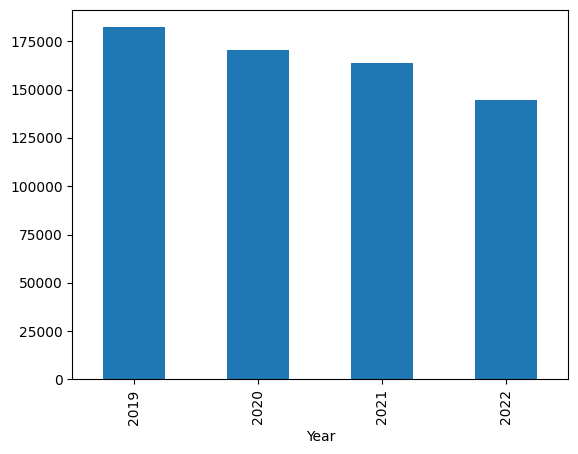

In [63]:
drive['Year'].value_counts().plot(kind = 'bar')
plt.show()


In [64]:
yer = drive['Year'].value_counts()

In [65]:
yer.index

Index([2019, 2020, 2021, 2022], dtype='int32', name='Year')

In [66]:
yer.values

array([182115, 170591, 163554, 144419])

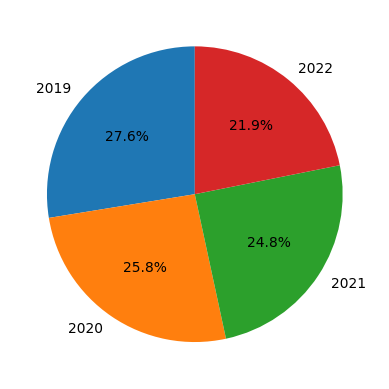

In [67]:
plt.pie(yer, 
        labels = yer.index,
        startangle = 90,
        autopct = '%1.1f%%'
       )
plt.show()

<h3>Insights NO.26</h3>
<h4>In every year that have past we didn't have much knowledge of the road accidents that happend we thought in the year 2019 have the least accidents that happend because thats the start of the pandemic but in the result above year 2019 has the most road accidents with 182115 record with 27.6% of the total road accident record </h4>

<h2>DISTRICT AREA </h2>

In [123]:

import folium
from folium.plugins import HeatMap

In [124]:
drive['District Area'].unique()


['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames', 'Hammersmith and Fulham', 'Hounslow', ..., 'County Durham', 'Shropshire', 'Central Bedfordshire', 'Cornwall', 'Wiltshire']
Length: 422
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']

In [125]:
drive['District Area'].value_counts().head(30)

District Area
Birmingham                  13491
Leeds                        8898
Manchester                   6720
Bradford                     6212
Sheffield                    5710
Westminster                  5706
Liverpool                    5587
Glasgow City                 4942
Bristol, City of             4819
Kirklees                     4690
Barnet                       4350
Lambeth                      4241
Leicester                    4082
Doncaster                    4078
Southwark                    3894
Nottingham                   3893
Edinburgh, City of           3824
Brighton and Hove            3784
Croydon                      3687
Sandwell                     3557
Ealing                       3500
Cardiff                      3474
Newcastle upon Tyne          3442
Wakefield                    3410
Tower Hamlets                3341
Wandsworth                   3264
East Riding of Yorkshire     3216
Hackney                      3207
Derby                        3194


<h3>Question no.1</h3>
<h4>In the weather conditions what kind of weather has the most accidents that happend with bar graph</h4>

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\3783977952.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_B = drive.groupby(['Month','Weather_Conditions']).size().unstack()


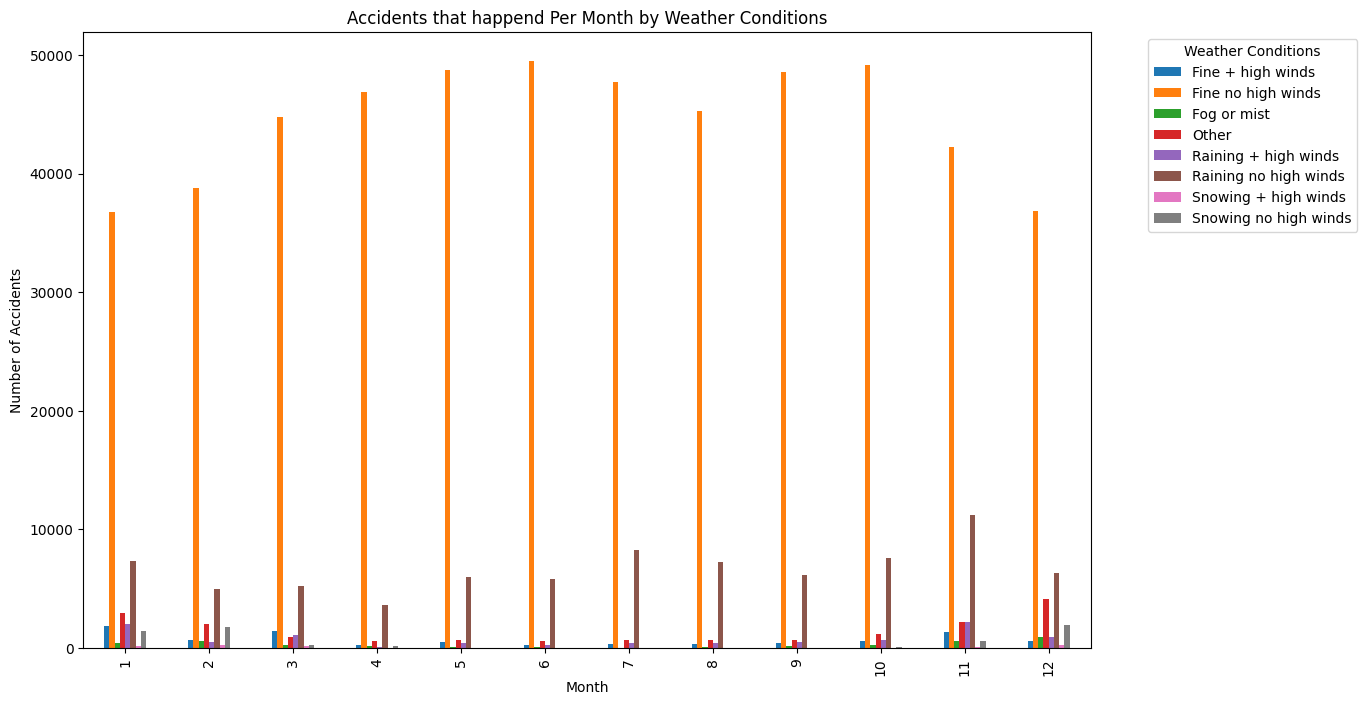

In [126]:
accidents_B = drive.groupby(['Month','Weather_Conditions']).size().unstack()
accidents_B.plot(kind='bar')
plt.title("Accidents that happend Per Month by Weather Conditions")
plt.xlabel('Month')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()

<h3>Insights no.1</h3>
<h4>In the bar graph that is shown above we can see that tha fine no high wind has the most accidents that happend in the Weather Conditions every month at the city of</h4>

<h3>Question no.2</h3>
<h4>At the year 2021 what kind of accident has the most records?</h4>

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\2050135726.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Newcastle_tyne = drive[drive['District Area'] == 'Newcastle upon Tyne'].groupby(['Year', 'Accident_Severity']).size().unstack()


Accident_Severity,Fatal,Serious,Slight
Year,,,
2019,7,83,846
2020,8,95,777
2021,4,98,754
2022,3,85,682


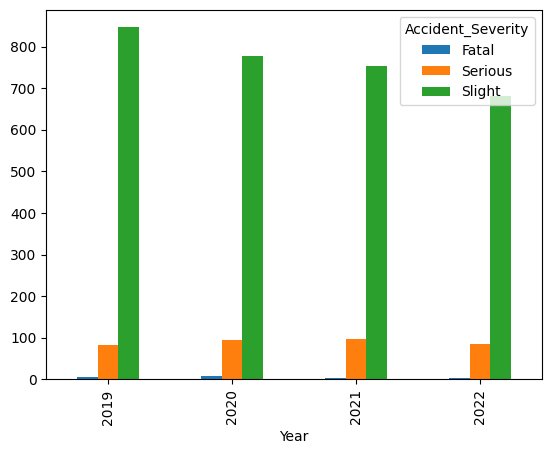

In [127]:
Newcastle_tyne = drive[drive['District Area'] == 'Newcastle upon Tyne'].groupby(['Year', 'Accident_Severity']).size().unstack()
Newcastle_tyne.plot(kind='bar')
Newcastle_tyne

<h3>Insights no.2</h3>
<h4>The records at the bar graph shows that the year 2021 the most accidents records is the slight accident with 777 records of it and as we can see in the bar graph most  have the slight accidents over the years </h4>

<h3>Question no.3</h3>
<h4>At the Glasgow City at the year 2020 which month has the lowest accident rate? </h4>

In [128]:
glas_c = drive[drive['District Area'] == 'Glasgow City']

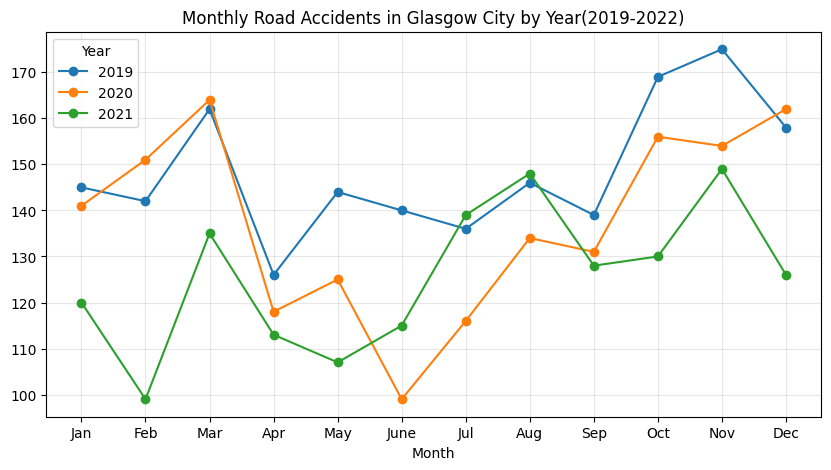

In [129]:
monthly_G = glas_c.groupby(['Year','Month']).size()

monthly_G = monthly_G.unstack(level=0)

monthly_G.plot(
    marker='o',
    figsize=(10,5),
    title='Monthly Road Accidents in Glasgow City by Year(2019-2022)'
)

plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

<h3>Insights no.3</h3>
<h4>Glasslgow City has 4942 accident records and at the year 2019 they have the most accident records but at the year 2020 they have the lowest record of road accidents and the month of june 2020 has the lowest road accidents record</h4>

<h3>Question no.4</h3>
<h4>At the District Area Southwark at the month of August which year has the most and lowest record of accidents?</h4>

In [130]:
south_w = drive[drive['District Area'] == 'Southwark']

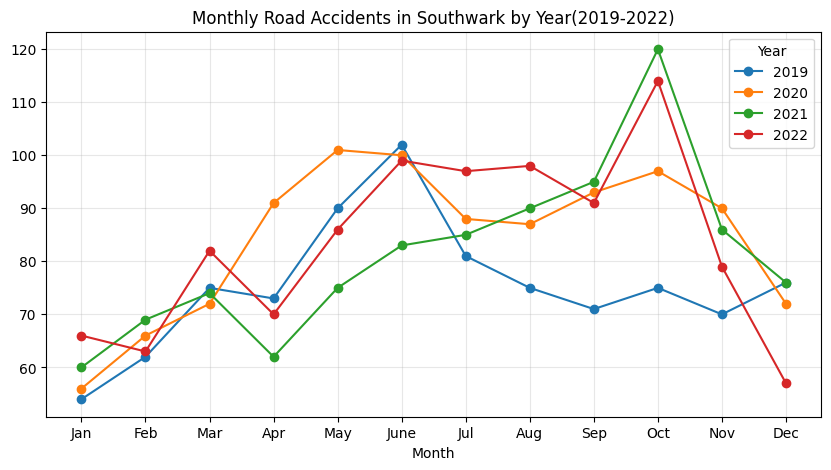

In [131]:
monthly_S = south_w.groupby(['Year','Month']).size()

monthly_S = monthly_S.unstack(level=0)

monthly_S.plot(
    marker='o',
    figsize=(10,5),
    title='Monthly Road Accidents in Southwark by Year(2019-2022)'
)

plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

In [132]:
locations = list(zip(south_w['Latitude'], south_w['Longitude']))
m = folium.Map(location=[south_w['Latitude'].mean(),drive['Longitude'].mean()],zoom_start=10)
HeatMap(locations).add_to(m)
m

<h3>Insights no.4</h3>
<h4>The District Area Southwark has 3894 records of accidents since 2019 to 2022, at the month of August the year 2022 has the most accident and year 2019 has the lowest record at the month of August.</h4>

<h3>Question no.5</h3>
<h4>At the Aberdeen City which month of the year 2019 has the highest accident records?</h4>

In [133]:
Aberdeen_City = drive[drive['District Area'] == 'Aberdeen City']

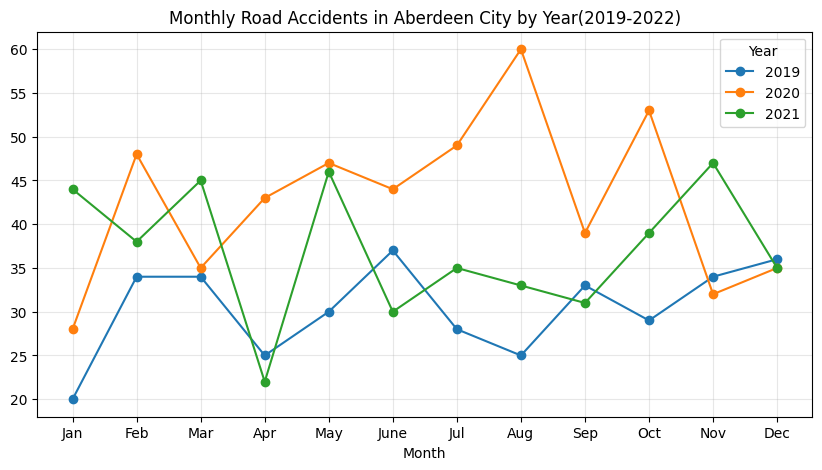

In [134]:
monthly_A = Aberdeen_City.groupby(['Year','Month']).size()

monthly_A = monthly_A.unstack(level=0)

monthly_A.plot(
    marker='o',
    figsize=(10,5),
    title='Monthly Road Accidents in Aberdeen City by Year(2019-2022)'
)

plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

In [135]:
locations = list(zip(Aberdeen_City['Latitude'], Aberdeen_City['Longitude']))
m = folium.Map(location=[Aberdeen_City['Latitude'].mean(),Aberdeen_City['Longitude'].mean()],zoom_start=10)
HeatMap(locations).add_to(m)
m

<h3>Insights no.5</h3>
<h4>At the year 2019 the month of june has the highest accident records and the moth of january 2019 has the lowest accident records.</h4>

<h3>Question no.6</h3>
<h4>How many percentage does the Ealing have with serious accidents?</h4>

C:\Users\DELL\AppData\Local\Temp\ipykernel_15100\3387922140.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ealing_c = drive[drive['District Area'] == 'Ealing'].groupby(drive['Accident_Severity']).size()


<Axes: >

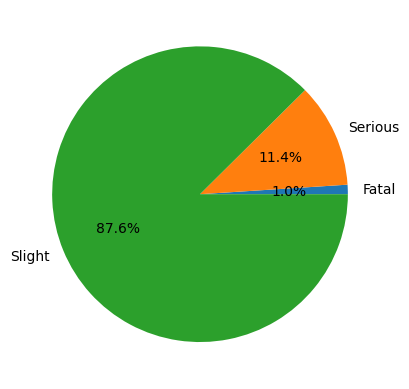

In [136]:

ealing_c = drive[drive['District Area'] == 'Ealing'].groupby(drive['Accident_Severity']).size()

ealing_c.plot(kind='pie', autopct="%1.1f%%")

<h3>Insights no.6</h3>
<h4>According to the pie graph there are 11.4% of serious accidents 
    that happend to the city of Ealing it's more than the
    Fatal accident with 1.0% records</h4>